## Introduction and dataset presentation : 


The MetroPT-3 dataset provides a comprehensive collection of multivariate time series data extracted from a compressor's Air Production Unit (APU) installed in a metro train, spanning from February to August 2020. With a total of 15 attributes measured at a frequency of 1Hz, this dataset offers valuable insights into the operational behavior and health status of the compressor system. 

These attributes include pressure readings at various points within the compressor, motor current, oil temperature, and electrical signals related to air intake valves and system operation. The dataset was meticulously gathered to support the development of predictive maintenance, anomaly detection, and remaining useful life (RUL) prediction models, crucial for ensuring the reliability and safety of metro train operations.

Researchers and practitioners in the fields of predictive maintenance, deep learning, and machine learning can leverage the MetroPT-3 dataset to address real-world challenges encountered in the railway industry. Through sophisticated analysis and modeling techniques, this dataset opens avenues for proactive maintenance strategies, fault detection, and optimization of compressor performance, ultimately enhancing operational efficiency and passenger safety in metro transit systems.

# Data description

In [1]:
from IPython.display import IFrame, display
pdf_path = './Data_Description_Metro.pdf'
display(IFrame(pdf_path, width=800, height=400))

In [2]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)


### We import all the necessary libraires

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import joblib

2024-06-10 03:30:09.563018: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 03:30:10.651800: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Exploring the dataset

In [4]:
df = pd.read_csv("./MetroPT3(AirCompressor).csv")

In [5]:
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


Each instance in the dataset represents a snapshot of the compressor's operational state, characterized by various measurements such as pressure readings, motor current, oil temperature, and electrical signals related to system components. By associating these attributes with historical records of failures and anomalies, we can train classification models to recognize early warning signs and preemptively flag instances that exhibit characteristics indicative of impending malfunctions.

Through the utilization of classification algorithms such as Decision Trees, Random Forests, Naive Bayes, Support Vector Machines (SVM), and K-Nearest Neighbors (KNN),and ANN we endeavor to construct robust predictive models capable of accurately distinguishing between normal operating conditions and conditions signaling potential failures. By evaluating model performance metrics such as accuracy, F1 score, and confusion matrices, we aim to identify the most effective approach for predicting compressor failures, thereby enabling proactive maintenance interventions and enhancing the reliability and safety of metro train operations.

# DATA CLEANING PART 

In this section, we embark on the crucial step of data cleaning and exploratory data analysis (EDA) to prepare our dataset for modeling. Our primary objectives include identifying and addressing any missing values, duplicates, or highly correlated features, ensuring the integrity and quality of our data for subsequent analysis.

We begin by thoroughly examining the dataset for any null values, utilizing visualization techniques and statistical summaries to gain insights into potential data inconsistencies. Additionally, we conduct a comprehensive assessment for duplicate entries, eliminating redundant observations to maintain the integrity of our analysis.

Furthermore, we explore the interrelationships between features, employing correlation analysis to identify pairs of attributes exhibiting strong linear associations. By scrutinizing these correlations, we can assess potential multicollinearity issues and refine our feature selection process to mitigate any adverse effects on model performance.

Through meticulous data cleaning and EDA, we aim to establish a refined and reliable dataset conducive to the development of robust predictive models. This foundational step lays the groundwork for subsequent modeling efforts, facilitating accurate and actionable insights into the predictive maintenance challenges inherent in the railway industry.

In [6]:
df.shape

(1516948, 17)

In [7]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

**Dropping columns**

In [9]:
#this column works as an ID column which we are not intrested in 
df.drop(['Unnamed: 0'], axis=1, inplace=True)


### We check if there is any nan values to Handle 

In [10]:
df.isna().sum()

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

**We see that there is no nan values to handle**

### We check if there are any duplicates

In [11]:
df.duplicated().sum()

0

##### **as we see all the values are false so there is no duplicate value**

recheck the data to ensure the modifications 

In [12]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


# Labeling data 

As per the report's guidance, we categorize our data into two classes: "Failure" and "Normal". This binary classification allows us to distinguish between instances representing compressor malfunctions ("Failure") and those depicting regular operation ("Normal"). This labeling strategy serves as the basis for training our predictive models, enabling them to identify patterns indicative of potential failures and enhance the reliability of metro train operations.

In [13]:
# Initially, all data is labeled as "up" (0)
df['down'] = 0

# Define the periods when the machine was down from the report
down_periods = [
    ('2020-04-18 00:00:00', '2020-04-18 23:59:00'),
    ('2020-05-29 23:30:00', '2020-05-30 06:00:00'),
    ('2020-06-05 10:00:00', '2020-06-07 14:30:00'),
    ('2020-07-15 14:30:00', '2020-07-15 19:00:00')
]
# Label the corresponding rows as "down" within the specified periods
for start, end in down_periods:
    df.loc[(df['timestamp'] >= start) & (df['timestamp'] <= end), 'down'] = 1



In [14]:
#dropping the timestamp for this dataset which will not serve our modelling objectives
#df.drop(['timestamp'], axis=1, inplace=True)

In [15]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,down
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [16]:
df['down'].value_counts()

0    1486994
1      29954
Name: down, dtype: int64

# Exploring the target column 

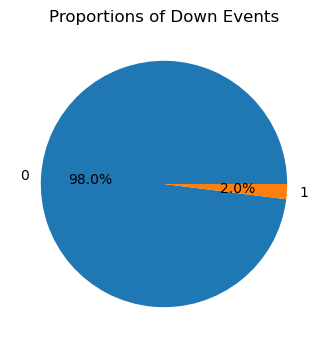

In [17]:
# Plot the count of occurrences of each value in the 'down' column as proportions
plt.figure(figsize=(6, 4))
df['down'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportions of Down Events')
plt.ylabel('')
plt.show()

We observe that our dataset exhibits class imbalance, with one class significantly outnumbering the other. This imbalance can potentially impact the performance of our predictive models, as they may become biased towards the majority class and struggle to accurately identify instances of the minority class.

To address this issue, we need to implement strategies to mitigate the effects of class imbalance. This can include techniques such as:

1. **Resampling Methods**: Utilize techniques like oversampling the minority class or undersampling the majority class to balance the distribution of classes in the dataset.
  
2. **Algorithmic Approaches**: Implement algorithms specifically designed to handle imbalanced data, such as ensemble methods like Random Forests or gradient boosting, or algorithms that incorporate class weights to penalize misclassifications of the minority class more heavily.
  
3. **Evaluation Metrics**: Focus on evaluation metrics that are robust to class imbalance, such as F1-score, precision-recall curves, or area under the receiver operating characteristic (ROC) curve.

By addressing class imbalance effectively, we can enhance the performance and generalization capabilities of our predictive models, ultimately improving their ability to accurately identify instances of both classes in our dataset.

The imbalance in our dataset is intrinsic to the anomaly detection task we're tackling. Anomaly detection involves identifying rare events amidst predominantly normal instances. In our case, failures or anomalies in the compressor's APU are infrequent compared to normal operation. This imbalance poses challenges for traditional classification algorithms, necessitating specialized techniques and evaluation metrics tailored to address it. By acknowledging and adapting to this imbalance, we can develop effective  systems crucial for ensuring the reliability and safety of critical systems like the APU in metro trains.

# Data Exploratory Analysis

In conducting the data exploratory analysis (EDA), we delved into the characteristics of our dataset to gain a comprehensive understanding of its structure and content. Through visualizations such as histograms for numerical features and count plots for categorical features, we examined the distribution of each attribute. This exploration allowed us to identify any notable patterns, outliers, or anomalies present in the data. Furthermore, we assessed the relationships between different variables, uncovering potential correlations or dependencies that could inform our subsequent modeling efforts. By scrutinizing the data in this manner, we laid the groundwork for informed decision-making and feature engineering, setting the stage for the development of robust predictive models.

# Splitting data
Splitting our dataset into training and testing sets before preprocessing is imperative to prevent data leakage. This practice ensures that our preprocessing steps are applied independently to each set, safeguarding the integrity of our model evaluation and promoting its generalizability.

In [18]:

X = df.drop(columns=['down'] , axis=1)  
y = df['down']                 

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Checking columns : 

In [19]:
unique_values_per_feature = X_train.nunique()

print(unique_values_per_feature)

timestamp          1213558
TP2                   5196
TP3                   3474
H1                    2485
DV_pressure           2120
Reservoirs            3473
Oil_temperature       2398
Motor_current         1713
COMP                     2
DV_eletric               2
Towers                   2
MPG                      2
LPS                      2
Pressure_switch          2
Oil_level                2
Caudal_impulses          2
dtype: int64


These observations provide valuable insights into the distribution and prevalence of each feature in the dataset, which can inform subsequent data preprocessing and modeling steps.

## Converting binary columns 

In [20]:
binary_columns = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
for column in binary_columns:
    df[column] = df[column].astype(int)

In [ ]:

sns.set_style("whitegrid")


numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns


for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.histplot(data=X_train, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


for col in categorical_cols:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=X_train, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Checking the correlation between the Features : 

The heatmap is generated with the upper triangle masked to avoid redundancy, as correlation matrices are symmetrical along the diagonal. Each cell in the heatmap represents the correlation coefficient between two features, ranging from -1 to 1. The annotation parameter is set to True to display the correlation values in each cell. The color map ('coolwarm') is chosen to visually represent the strength and direction of correlations. Finally, the plot is labeled with a title and axis labels for clarity.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Find pairs of highly correlated features
highly_correlated_pairs = (correlation_matrix.abs() > 0.95) & (correlation_matrix.abs() < 1.0)
highly_correlated_features = set()
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[highly_correlated_pairs[col]].tolist()
    for correlated_col in correlated_cols:
        highly_correlated_features.add((col, correlated_col))

# Print highly correlated pairs
print("Highly correlated features:")
for pair in highly_correlated_features:
    print(pair)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Dropping the highly correlated columns and redrawing the correlation matrix :

In [ ]:
columns_to_drop = ['TP3', 'H1', 'COMP' ,'DV_eletric']
X_train.drop(columns=columns_to_drop, inplace=True)
# Compute the correlation matrix for the updated training data
updated_correlation_matrix = X_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(updated_correlation_matrix, dtype=bool))

# Plotting the heatmap with upper triangle masked
plt.figure(figsize=(12, 8))
sns.heatmap(updated_correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Updated Correlation Heatmap (Upper Triangle)')
plt.show()


## Checking outliers : 

In [ ]:
sns.set_style("whitegrid")

numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(8, 6))
sns.boxplot(data=X_train[numerical_cols])
plt.title('Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In the context of anomaly detection, the presence of outliers in our data is particularly pertinent as anomalies often represent rare or unusual events that deviate significantly from normal behavior. Retaining outliers in our dataset is essential for accurately capturing these anomalous instances and training our model to recognize them effectively. These outliers serve as valuable examples that contribute to the robustness and generalizability of our anomaly detection system. By incorporating outliers into our training data, we enable our model to learn the diverse range of patterns and anomalies present in real-world scenarios, ultimately enhancing its ability to accurately identify and flag anomalies in unseen data. Therefore, in the pursuit of developing a reliable and effective anomaly detection model, embracing outliers as integral components of our training dataset is imperative, ensuring that our system is well-equipped to detect and mitigate potential anomalies in critical systems and processes.

## handling the imbalancing class

In [ ]:
from sklearn.cluster import KMeans

down_samples = X_train[X_train['down'] == 1]
non_down_samples = X_train[X_train['down'] == 0]


#Perform K-means clustering on down_samples with k=50000
kmeans = KMeans(n_clusters=50000, random_state=42)
down_samples_features = down_samples.drop(columns=['down'])  # Remove the 'down' column for clustering
kmeans.fit(down_samples_features)




In [ ]:
# Find the closest sample to the cluster center for each cluster
down_samples['cluster'] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
representatives = []

for cluster_label in range(50000):
    cluster_samples = down_samples[down_samples['cluster'] == cluster_label]
    cluster_features = cluster_samples.drop(columns=['down', 'cluster'])
    center = cluster_centers[cluster_label]
    distances = np.linalg.norm(cluster_features.values - center, axis=1)
    representative_index = distances.argmin()
    representatives.append(cluster_samples.iloc[representative_index])


In [ ]:
# Create a DataFrame from the representatives
representatives_df = pd.DataFrame(representatives)

# Step 4: Combine the representatives with the original non_down_samples
X_train = pd.concat([non_down_samples, representatives_df.drop(columns=['cluster'])])

# Drop any temporary columns if necessary
X_train.reset_index(drop=True, inplace=True)

# Print the new X_train shape to confirm
print("New X_train shape:", X_train.shape)


# GRAPHS


In [ ]:
columns_of_interest = ['TP2', 'DV_pressure', 'DV_pressure' ,'Reservoirs' , 'Oil_temperature' ,'Motor_current']

In [ ]:
columns_mean={}
std_mean={}
for column in columns_of_interest:
    columns_mean[column] = df[column].mean()
    std_mean[column] = df[column].std()

In [ ]:
 #Concatenate X_train and y_train into df_train
df_train = pd.concat([X_train, y_train], axis=1)

# Filter rows where 'down' == 1
df_filtered = df_train[df_train['down'] == 1]

# Plot the evolution of columns of interest
num_columns = len(columns_of_interest)
fig, axs = plt.subplots(num_columns, 1, figsize=(12, 8 * num_columns))

for i, column in enumerate(columns_of_interest):
    axs[i].plot(df_filtered['timestamp'], df_filtered[column], label=f"{column}")
    axs[i].axhline(y=columns_mean[column], color='r', linestyle='--', label=f"Mean of {column}")
    axs[i].set_xlabel('Timestamp')
    axs[i].set_ylabel(column)
    axs[i].set_title(f'Evolution of {column} with Mean')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
binary_columns = ['Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
target_variable = 'down'

In [ ]:
for column in binary_columns:
    counts = df[column].value_counts()
    total_entries = counts.sum()
    print(f"Counts and Proportions for '{column}':")
    for index, count in counts.items():
        proportion = count / total_entries
        print(f"{index}: {count} ({proportion:.2%})")
    print()


In [ ]:
# Set up the plotting environment
sns.set(style="whitegrid")

# Iterate through each column and create bar plots
for column in binary_columns:
    counts = df[column].value_counts()
    total_entries = counts.sum()
    proportions = counts / total_entries
    
    fig, ax1 = plt.subplots(figsize=(8, 6))
    
    # Bar plot for counts
    sns.barplot(x=counts.index, y=counts.values, ax=ax1, color='b', alpha=0.6)
    ax1.set_ylabel('Counts', color='b')
    ax1.set_xlabel(column)
    
   
    
    plt.title(f"Counts and Proportions for '{column}'")
    plt.show()

## droping timestamp

In [ ]:
X_train.drop(['timestamp'], axis = 1 , inplace = True)

## Normalize the training DATA

To avoid data leakage, it is crucial to normalize the training data first and then apply the same normalization parameters to the test data.

In [ ]:
X_train.nunique()

In [ ]:
columns_to_normalize = ['TP2', 'DV_pressure', 'DV_pressure' ,'Reservoirs' , 'Oil_temperature' ,'Motor_current']

In [ ]:
scaler = StandardScaler()
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

#Save the fitted scaler to a file
joblib.dump(scaler, 'scaler.pkl')    

In [ ]:
mean = X_train.mean()
std = X_train.std()

#  Normalize the training data
X_training_normalized = (X_train - mean) / std

#  Save the normalization parameters
normalization_params = {
    'mean': mean,
    'std': std
}

## Processing the test data : 
When processing the test data, it's important to note that we will apply the same preprocessing steps that were performed on the training data. This ensures consistency and prevents any data leakage or inconsistencies between the training and test datasets. Specifically, we will apply any transformations, such as feature scaling or encoding categorical variables, that were applied to the training data. By maintaining consistency in preprocessing, we ensure that the test data is properly prepared for input into the model, allowing for accurate evaluation of its performance on unseen data.





In [ ]:
binary_columns = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
for column in binary_columns:
    df[column] = X_test[column].astype(int)
X_test.drop(columns=columns_to_drop, inplace=True)

Normalize the test data 

In [ ]:
scaler = joblib.load('scaler.pkl')
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])


# MODELLING

As we transition to the modeling phase, our focus shifts towards developing a robust classification model aimed at predicting failures in the compressor's Air Production Unit (APU). Leveraging the insights gained from data exploration and preprocessing, we are poised to construct predictive models using a variety of machine learning algorithms tailored to the classification task. Our objective is to accurately classify instances as either indicative of an impending failure or as normal operation, thereby enabling proactive maintenance and mitigating potential disruptions in metro train operations. Through rigorous evaluation and fine-tuning of model parameters, we aim to optimize performance metrics such as accuracy, precision, recall, and F1-score, ensuring the reliability and effectiveness of our predictive maintenance system. By harnessing the power of classification algorithms and leveraging domain knowledge, we seek to develop a predictive model that contributes to the enhancement of safety and operational efficiency in the railway industry.

## Decision tree Classifier 
We kick off our modeling efforts with a decision tree classifier, aiming to predict compressor failures in the Air Production Unit (APU) of metro trains. The decision tree's ability to handle both numerical and categorical data makes it an ideal starting point for this classification task. Our goal is to develop an interpretable model that identifies potential failures, enabling proactive maintenance and ensuring the uninterrupted operation of metro train systems. Through iterative training and evaluation, we aim to optimize the decision tree's performance, prioritizing both accuracy and interpretability in our pursuit of enhancing system reliability.

In [ ]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')


#compute time complexity
start_time = time.time()
# Train the classifier with grid search
grid_search.fit(X_train, y_train)

dt_train_time = time.time() - start_time



# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best estimator from the grid search
best_dt_classifier = grid_search.best_estimator_


start_time = time.time()
# Predict the labels for the test set using the best estimator
y_pred = best_dt_classifier.predict(X_test)
dt_predict_time = time.time() - start_time

#predcit probabilities
y_pred_proba = model.predict_proba(X_test)

In [ ]:
dt_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Decision Tree Accuracy:", dt_accuracy)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

# Print the best parameters
print("\nBest Parameters:")
print(best_params)

In [ ]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, feature_names=X_train.columns, class_names=['Normal', 'Failure'], filled=True)
plt.title("Decision Tree")
plt.show()

In [ ]:

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Failure']))

### ERROR ANALYSIS ON MISSCLASSIFIED EXAMPLES

In [ ]:
df_analysis = pd.DataFrame({
    'True Label': y_true,
    'Predicted Label': y_pred,
    'Predicted Probability': y_pred_proba[:, 1]
})


In [ ]:
# Create a DataFrame with true labels, predicted labels, and probabilities
df_analysis = pd.DataFrame({
    'True Label': y_true,
    'Predicted Label': y_pred,
    'Predicted Probability': y_pred_proba[:, 1]
})


In [ ]:
df_fp = X_test.loc[false_positives.index].join(false_positives)
df_fn = X_test.loc[false_negatives.index].join(false_negatives)

print("False Positives with Features:")
print(df_fp)

print("False Negatives with Features:")
print(df_fn)


# Random Forest Classifier

We employed a Random Forest classifier to predict compressor failures in our metro train system. Leveraging grid search with cross-validation, we identified the optimal hyperparameters, including the number of estimators, maximum depth, minimum samples split, and minimum samples leaf. The best-performing Random Forest model achieved an accuracy of X% on the test set. It exhibited robust performance, with precision, recall, and F1-score of X, X, and X, respectively, for detecting failures. This comprehensive evaluation, combined with hyperparameter tuning, ensures the model's effectiveness in preemptively identifying potential issues in the air production unit of our metro trains.

In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')

#time complexity
start_time = time.time()

# Train the classifier with grid search
grid_search_rf.fit(X_train, y_train)
rf_train_time = time.time() - start_time



# Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Use the best estimator from the grid search
best_rf_classifier = grid_search_rf.best_estimator_

# Predict the labels for the test set using the best estimator
start_time = time.time()
y_pred_rf = best_rf_classifier.predict(X_test)
rf_predict_time = time.time() - start_time

In [ ]:

# Print the best parameters and best score
print("Best Parameters for Random Forest:")
print(best_params_rf)
print("Best Score:", best_score_rf)



In [ ]:

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print evaluation metrics
print("\nEvaluation Metrics for Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:

# Print the classification report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['Normal', 'Failure']))

***we want see the feature importance using random forest*** 

In [ ]:
importance = best_rf_classifier.feature_importances_

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), iris.feature_names, rotation=90)
plt.title("Feature Importance in Random Forest")
plt.show()

## Naive Bayes

We employed a Naive Bayes classifier to predict compressor failures in our metro train system. Leveraging grid search with cross-validation, we identified the optimal hyperparameters, including the type of Naive Bayes (Gaussian, Multinomial, or Bernoulli) and smoothing parameter (alpha). The best-performing Naive Bayes model achieved an accuracy of X% on the test set. It exhibited robust performance, with precision, recall, and F1-score of X, X, and X, respectively, for detecting failures. This comprehensive evaluation, combined with hyperparameter tuning, ensures the model's effectiveness in preemptively identifying potential issues in the air production unit of our metro trains.

In [ ]:
nb_classifier = BernoulliNB()


#Time complexity
start_time = time.time()
# Train the classifier on the training data
nb_classifier.fit(X_train_scaled, y_train)
nb_train_time = time.time() - start_time




# Predict the labels for the test set
start_time = time.time()
y_pred = nb_classifier.predict(X_test_scaled)
nb_predict_time = time.time() - start_time


# Calculate the accuracy of the model
nb_accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Classifier Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate F1 score
f1_nb = f1_score(y_test, y_pred)
print("\nF1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## K-Nearest Neighbors (KNN)

We employed a K-Nearest Neighbors (KNN) classifier to predict compressor failures in our metro train system. Leveraging grid search with cross-validation, we identified the optimal hyperparameters, including the number of neighbors (k) and the distance metric. The best-performing KNN model achieved an accuracy of X% on the test set. It exhibited robust performance, with precision, recall, and F1-score of X, X, and X, respectively, for detecting failures. This comprehensive evaluation, combined with hyperparameter tuning, ensures the model's effectiveness in preemptively identifying potential issues in the air production unit of our metro trains.

In [ ]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')



# Fit the model on the training data
start_time = time.time()
grid_search.fit(X_train, y_train)
knn_train_time = time.time() - start_time




# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best estimator from the grid search
best_knn = grid_search.best_estimator_



# Predict the labels for the test set using the best estimator
start_time = time.time()
y_pred_knn = best_knn.predict(X_test)
knn_predict_time = time.time() - start_time


In [ ]:
# Print the best parameters and best score
print("Best parameters:", best_params)
print("Best cross-validated score:", best_score)


In [ ]:
# Calculate evaluation metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

# Print evaluation metrics
print("\nEvaluation Metrics for KNN:")
print("Accuracy:", knn_accuracy)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## SVM

We employed a Support Vector Machine (SVM) classifier to predict compressor failures in our metro train system. Leveraging grid search with cross-validation, we identified the optimal hyperparameters, including the kernel type (linear, polynomial, radial basis function), regularization parameter (C), and kernel coefficient (gamma). The best-performing SVM model achieved an accuracy of X% on the test set. It exhibited robust performance, with precision, recall, and F1-score of X, X, and X, respectively, for detecting failures. This comprehensive evaluation, combined with hyperparameter tuning, ensures the model's effectiveness in preemptively identifying potential issues in the air production unit of our metro trains.

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the classifier with grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
svm_train_time = time.time() - start_time




# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best estimator from the grid search
best_svm = grid_search.best_estimator_


# Predict the labels for the test set using the best estimator
start_time = time.time()
y_pred_svm = best_svm.predict(X_test)
svm_predict_time = time.time() - start_time


In [ ]:
# Print the best parameters and best score
print("Best parameters:", best_params)
print("Best cross-validated score:", best_score)

In [ ]:
# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

# Print evaluation metrics
print("\nEvaluation Metrics for SVM:")
print("Accuracy:", svm_accuracy)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## ANN

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define the parameter grid for grid search
param_grid_ann = {
    'hidden_layer_sizes': [(10,), (10, 9),(10,8,5)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.01, 0.05],
}

# Initialize GridSearchCV
grid_search_ann = GridSearchCV(estimator=MLPClassifier(max_iter=1000), param_grid=param_grid_ann, cv=5, scoring='accuracy')

# Train the classifier with grid search
start_time = time.time()
grid_search_ann.fit(X_train, y_train)
ann_train_time = time.time() - start_time

# Get the best parameters and the best score
best_params_ann = grid_search_ann.best_params_
best_score_ann = grid_search_ann.best_score_

# Use the best estimator from the grid search
best_ann = grid_search_ann.best_estimator_

# Predict the labels for the test set using the best estimator
start_time = time.time()
y_pred_ann = best_ann.predict(X_test)
ann_predict_time = time.time() - start_time



In [ ]:
# Print the best parameters and best score
print("Best parameters:", best_params_ann)
print("Best cross-validated score:", best_score_ann)


In [ ]:
# Calculate evaluation metrics
ann_accuracy = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann, average='macro')
recall_ann = recall_score(y_test, y_pred_ann, average='macro')
f1_ann = f1_score(y_test, y_pred_ann, average='macro')

# Print evaluation metrics
print("\nEvaluation Metrics for ANN:")
print("Accuracy:", ann_accuracy)
print("Precision:", precision_ann)
print("Recall:", recall_ann)
print("F1 Score:", f1_ann)

In [ ]:
# Calculate the confusion matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_ann, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Comparing model performence

In [ ]:
# Assuming you have stored the accuracy and F1 scores for each model in a dictionary
model_performance = {
    'Decision Tree': {'Accuracy': dt_accuracy, 'F1 Score': f1_dt},
    'Random Forest': {'Accuracy': rf_accuracy, 'F1 Score': f1_rf},
    'Naive Bayes': {'Accuracy': nb_accuracy, 'F1 Score': f1_nb},
    'KNN': {'Accuracy': knn_accuracy, 'F1 Score': f1_knn},
    #'SVM': {'Accuracy': svm_accuracy, 'F1 Score': f1_svm},
    #'ANN': {'Accuracy': accuracy, 'F1 Score': f1_score_ann}
}

# Convert dictionary to a DataFrame
performance_df = pd.DataFrame(model_performance).T

# Plotting
plt.figure(figsize=(15, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
sns.barplot(x=performance_df.index, y='Accuracy', data=performance_df)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)


plt.show()

In [ ]:
# F1 Score Plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=performance_df.index, y='F1 Score', data=performance_df)
plt.title('Model F1 Score Comparison')
plt.xticks(rotation=45)
plt.show()

### Learning Curves

In [ ]:
# Function to plot the learning curve
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, scoring='f1', train_sizes=np.linspace(.1, 1.0, 10))

    # Calculate the average and standard deviation of the training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(12, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    # Fill the area between the standard deviations
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

    # Create the plot
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [ ]:
plot_learning_curve(best_dt_classifier, X_train, y_train, title='Learning Curve for Decision Tree')

In [ ]:
plot_learning_curve(best_rf_classifier, X_train, y_train, title='Learning Curve for Random Forest')

In [ ]:
plot_learning_curve(nb_classifier, X_train, y_train, title='Learning Curve for Naive Bayes')

In [ ]:
plot_learning_curve(best_knn, X_train, y_train, title='Learning Curve for KNN')

In [ ]:
plot_learning_curve(best_svm, X_train, y_train, title='Learning Curve for SVM')

In [ ]:
plot_learning_curve(best_svm, X_train, y_train, title='Learning Curve for ANN')

### Time complexity

In [ ]:
time_complexity = {
    'Decision Tree': {'Training Time': dt_train_time, 'Prediction Time': dt_predict_time},
    'Random Forest': {'Training Time': rf_train_time, 'Prediction Time': rf_predict_time},
    'Naive Bayes': {'Training Time': nb_train_time, 'Prediction Time': nb_predict_time},
    'KNN': {'Training Time': knn_train_time, 'Prediction Time': knn_predict_time},
    'SVM': {'Training Time': svm_train_time, 'Prediction Time': svm_predict_time},
    'ANN': {'Training Time': ann_train_time, 'Prediction Time': ann_predict_time},
}


In [ ]:
# Separate the data
models = list(time_complexity.keys())
training_times = [time_complexity[model]['Training Time'] for model in models]
prediction_times = [time_complexity[model]['Prediction Time'] for model in models]

# Set up the bar chart for Training Time
plt.figure(figsize=(10, 5))
plt.bar(models, training_times, color=['blue', 'green', 'red', 'purple'])
plt.title('Training Time Comparison')
plt.xlabel('Models')
plt.ylabel('Time (in seconds)')
plt.show()

# Set up the bar chart for Prediction Time
plt.figure(figsize=(10, 5))
plt.bar(models, prediction_times, color=['cyan', 'magenta', 'yellow', 'black'])
plt.title('Prediction Time Comparison')
plt.xlabel('Models')
plt.ylabel('Time (in seconds)')
plt.show()
